# Fault Diagnosis of Gear

In [23]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset (https://www.kaggle.com/brjapon/gearbox-fault-diagnosis)

# Import and scale the data

In [22]:
df  = pd.read_csv('Gear_Fault_data.csv')
df

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0.0,F
1,2.452970,1.400100,-2.825100,0.984487,0.0,F
2,-0.241284,-0.267390,0.793540,0.605862,0.0,F
3,1.130270,-0.890918,0.696969,0.613068,0.0,F
4,-1.296140,0.980479,-1.130560,-0.346971,0.0,F
...,...,...,...,...,...,...
2021114,0.677448,-3.234410,-1.725990,-3.143020,0.9,H
2021115,-10.575400,7.725400,-2.184010,2.569650,0.9,H
2021116,-4.033290,2.576920,1.468430,2.728910,0.9,H
2021117,1.868670,-5.089400,5.342290,-1.365630,0.9,H


In [27]:
X = df.iloc[::100,:-1]
Y = df.iloc[::100,-1]

C:\Users\mohan\.conda\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20212 samples in 0.050s...
[t-SNE] Computed neighbors for 20212 samples in 1.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20212
[t-SNE] Computed conditional probabilities for sample 2000 / 20212
[t-SNE] Computed conditional probabilities for sample 3000 / 20212
[t-SNE] Computed conditional probabilities for sample 4000 / 20212
[t-SNE] Computed conditional probabilities for sample 5000 / 20212
[t-SNE] Computed conditional probabilities for sample 6000 / 20212
[t-SNE] Computed conditional probabilities for sample 7000 / 20212
[t-SNE] Computed conditional probabilities for sample 8000 / 20212
[t-SNE] Computed conditional probabilities for sample 9000 / 20212
[t-SNE] Computed conditional probabilities for sample 10000 / 20212
[t-SNE] Computed conditional probabilities for sample 11000 / 20212
[t-SNE] Computed conditional probabilities for sample 12000 / 20212
[t-SNE] Computed conditional probabilities for sa

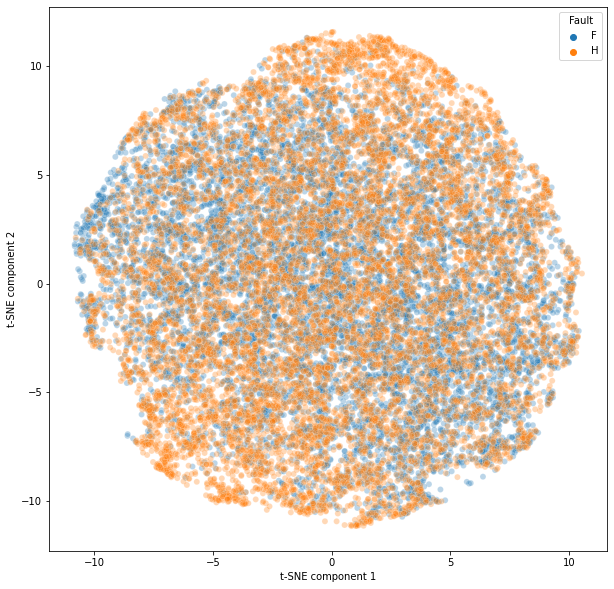

In [28]:
from sklearn.manifold import TSNE
X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

tSNEdf['Fault']=np.array(Y)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True)

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
# On training Data
clf.score(X_train,y_train)

1.0

# Performance of the proposed model

In [32]:
clf.score(X_test,y_test)

0.6035620052770448

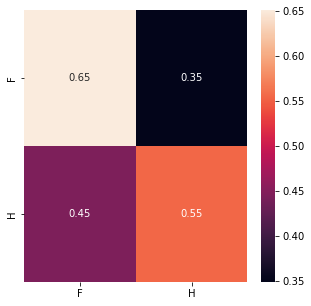

In [33]:


y_pred = clf.predict(X_test)


from sklearn.metrics import confusion_matrix


plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=clf.classes_,yticklabels=clf.classes_)
plt.show()